In [517]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# sol 1

In [518]:
df=pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [519]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [520]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

<Axes: >

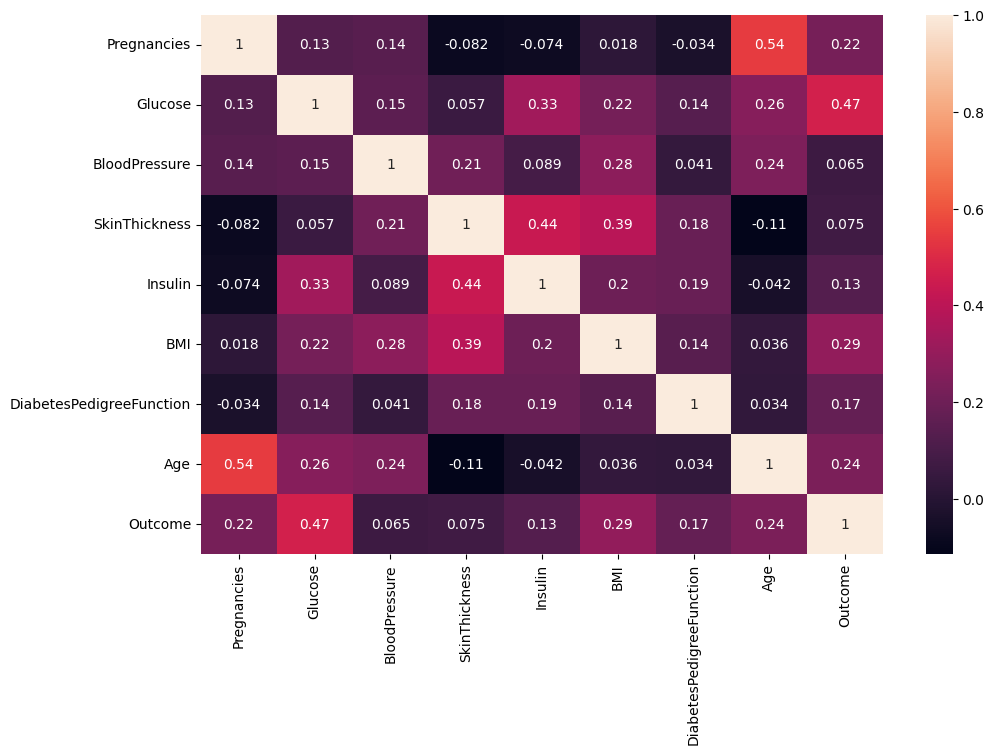

In [521]:
import seaborn as sns
plt.figure(figsize=[11,7])
sns.heatmap(df.corr(),annot=True) # the more lighter color show that the variables are highly correlative to each other

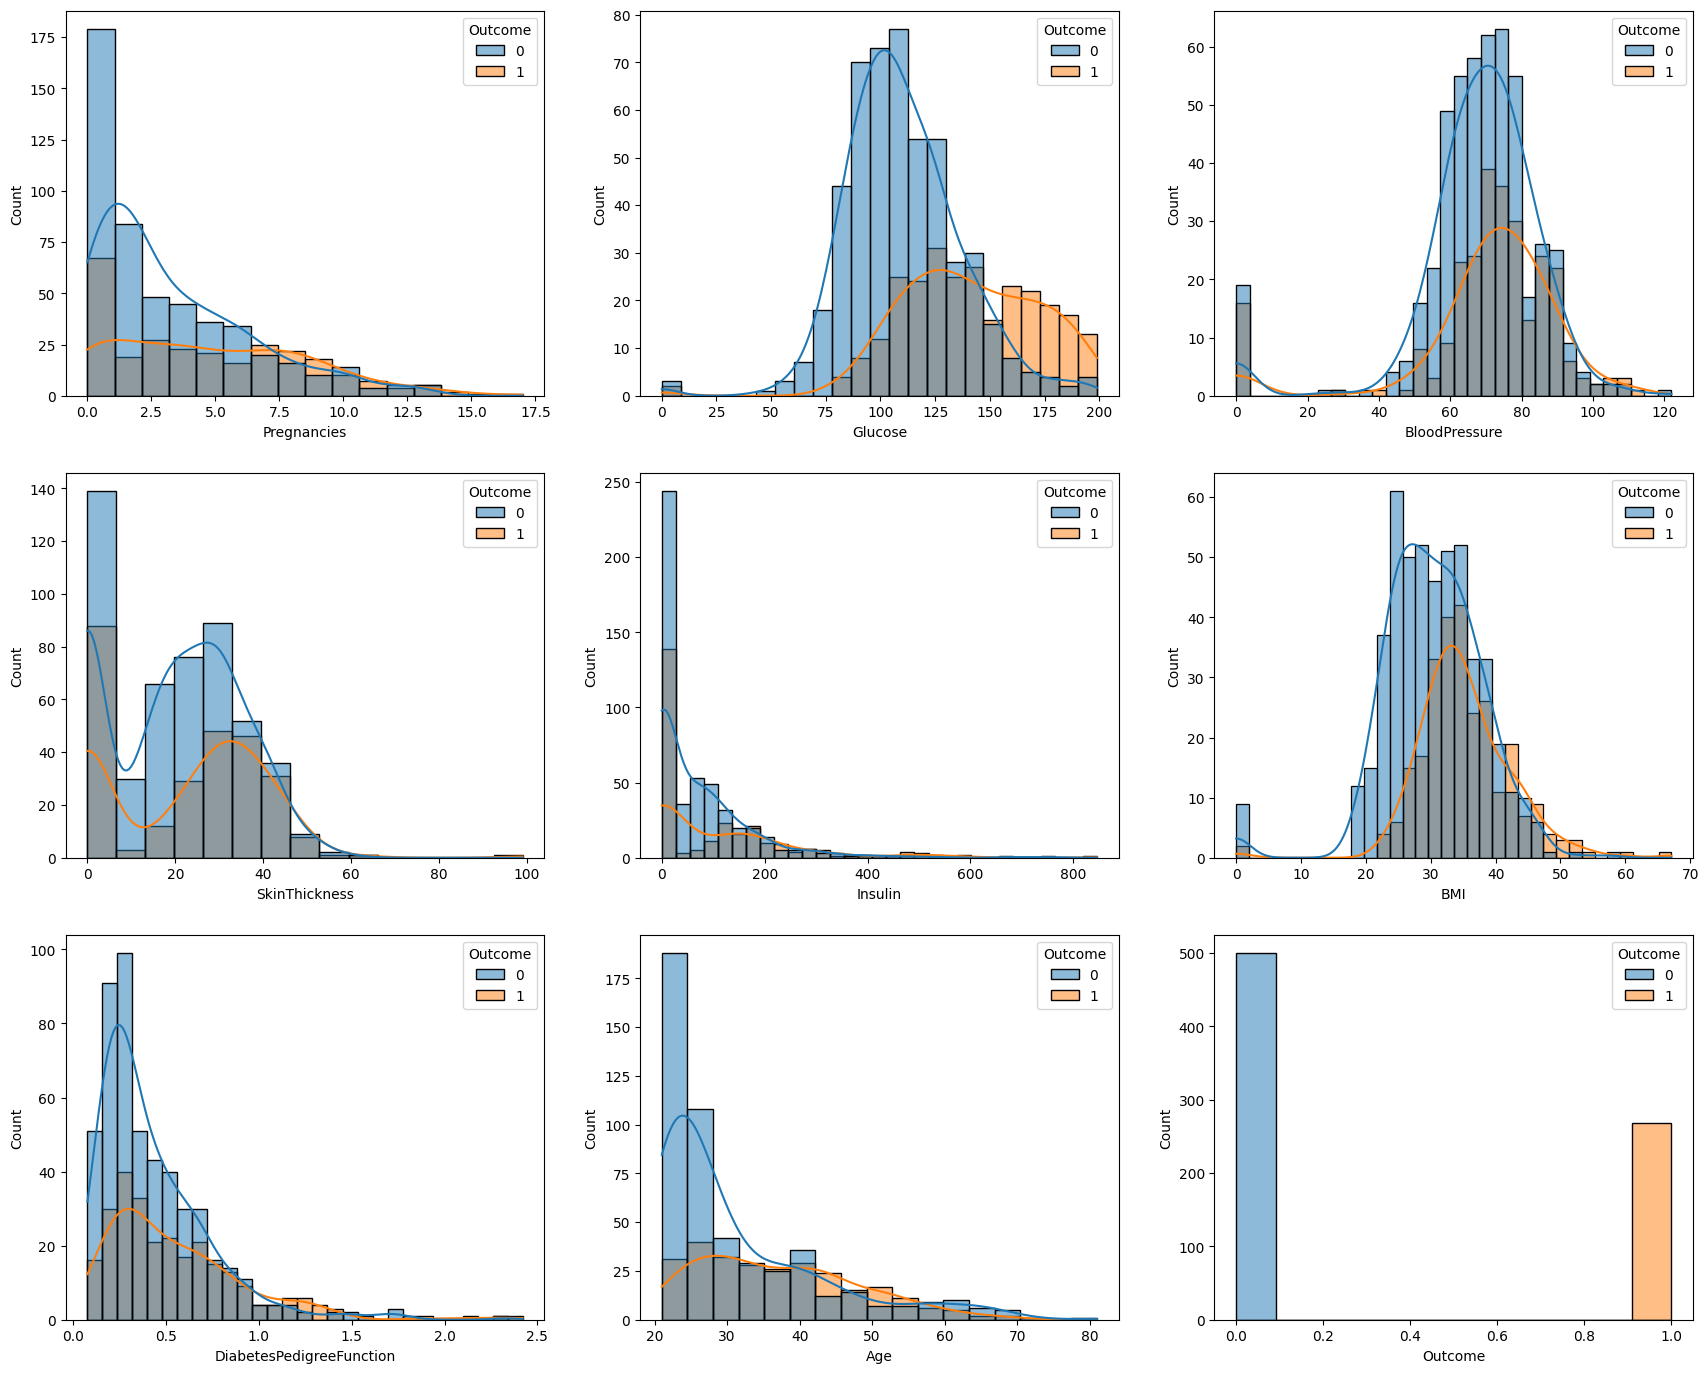

In [522]:
## check the points distribution by scatter plot on the base of outcome
plt.figure(figsize=[21,17])
b=1
for i in df.columns:
    plt.subplot(3,3,b)
    b+=1
    sns.histplot(x=df[i],kde=True,hue=df["Outcome"])

plt.show()



In [523]:
# we can see many observations from the above visual graphs
# 1. If the glucose levels are high, there are more chances to be a diabetic
# 2. We can see from the ninth graph that the diabetic person is less than non-diabetic person here 1 represent the diabetes and 0 represent non-diabetic person so we can conclude that this is the imbalance data set.
# 3. As we can see in third and fourth graph, the both KDE lines are similar. This show that there are no difference while predicting the outcome in both of the cases in skin thickness, and in blood pressure and above, we also see that the both variables are very less correlated to the outcome.

# sol 2


In [524]:
df.isnull().sum()
## we have no null values in our dataset

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

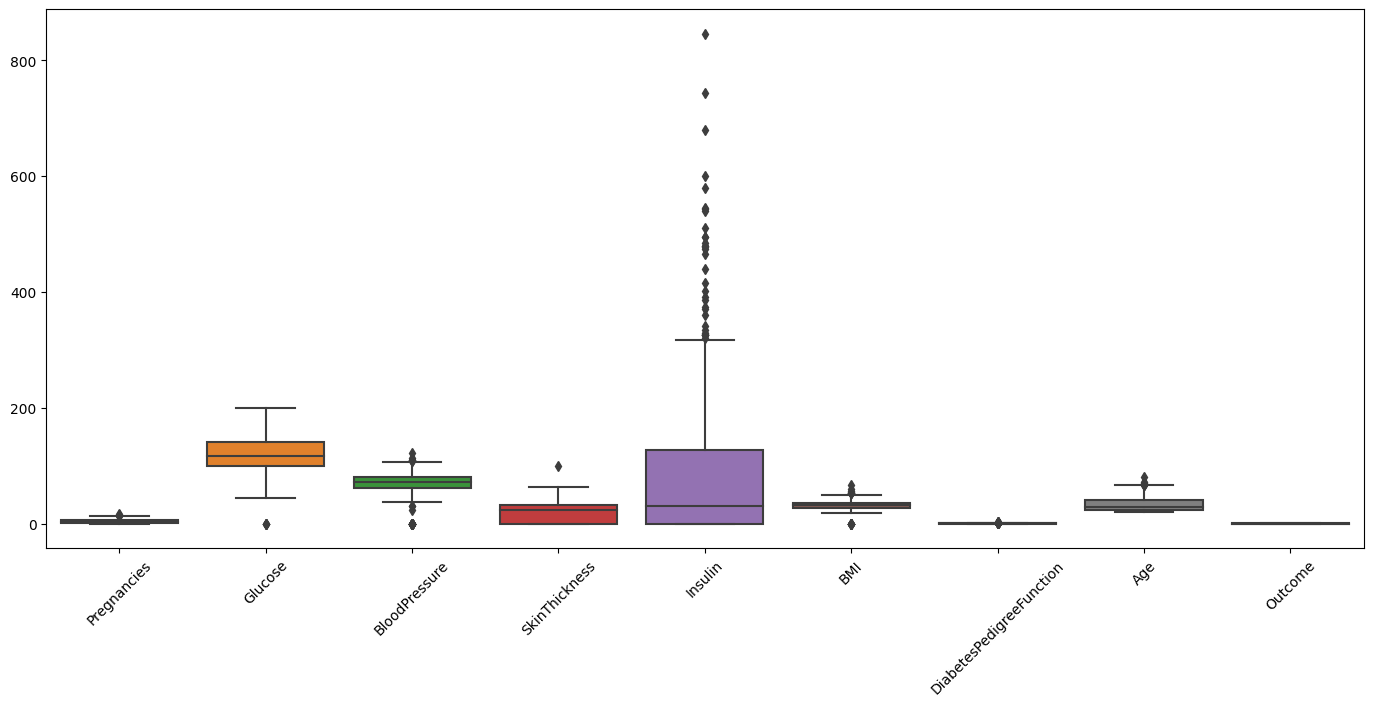

In [525]:
#check outliers
plt.figure(figsize=[17,7])
# df.plot.box()
sns.boxplot(df)
plt.xticks(rotation=45)
plt.show()

## result 
# her we can clearly se that there are many outliers are present in our dataset mainly in insulin variable

In [526]:
## removing outliers
import numpy as np

# Sample data
def remove_outliers(dataframe:pd.DataFrame,threshold:float = 1.5):
    index_list=[] 
    for column in dataframe.columns:
        # Calculate the IQR
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        # Define a threshold for outliers (e.g., 1.5 times IQR)
        threshold = 1.5
        # Remove outliers
        filtered_data = [d if (Q1 - threshold * IQR) < d < (Q3 + threshold * IQR) else np.nan for d in df[column]]
        index_list.append(filtered_data) 
    index_list=np.array(index_list).transpose()
    df_clean=pd.DataFrame(index_list,columns=dataframe.columns)

    return df_clean
    # return index_list
df_clean=remove_outliers(df)
df_clean.head(10)





,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,NaN,33.0,1.0
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,0.0
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,1.0
7,10.0,115.0,NaN,0.0,0.0,35.3,0.134,29.0,0.0
8,2.0,197.0,70.0,45.0,NaN,30.5,0.158,53.0,1.0
9,8.0,125.0,96.0,0.0,0.0,NaN,0.232,54.0,1.0


In [527]:
## we add the null values were the outliers are present in our dataset and now we can easily drop the null values
print(f"\n\nthe new null values\n{(df_clean.isnull().sum())}")



the new null values
Pregnancies                  4
Glucose                      5
BloodPressure               45
SkinThickness                1
Insulin                     34
BMI                         19
DiabetesPedigreeFunction    29
Age                          9
Outcome                      0
dtype: int64


In [528]:
df_clean.dropna(inplace=True)

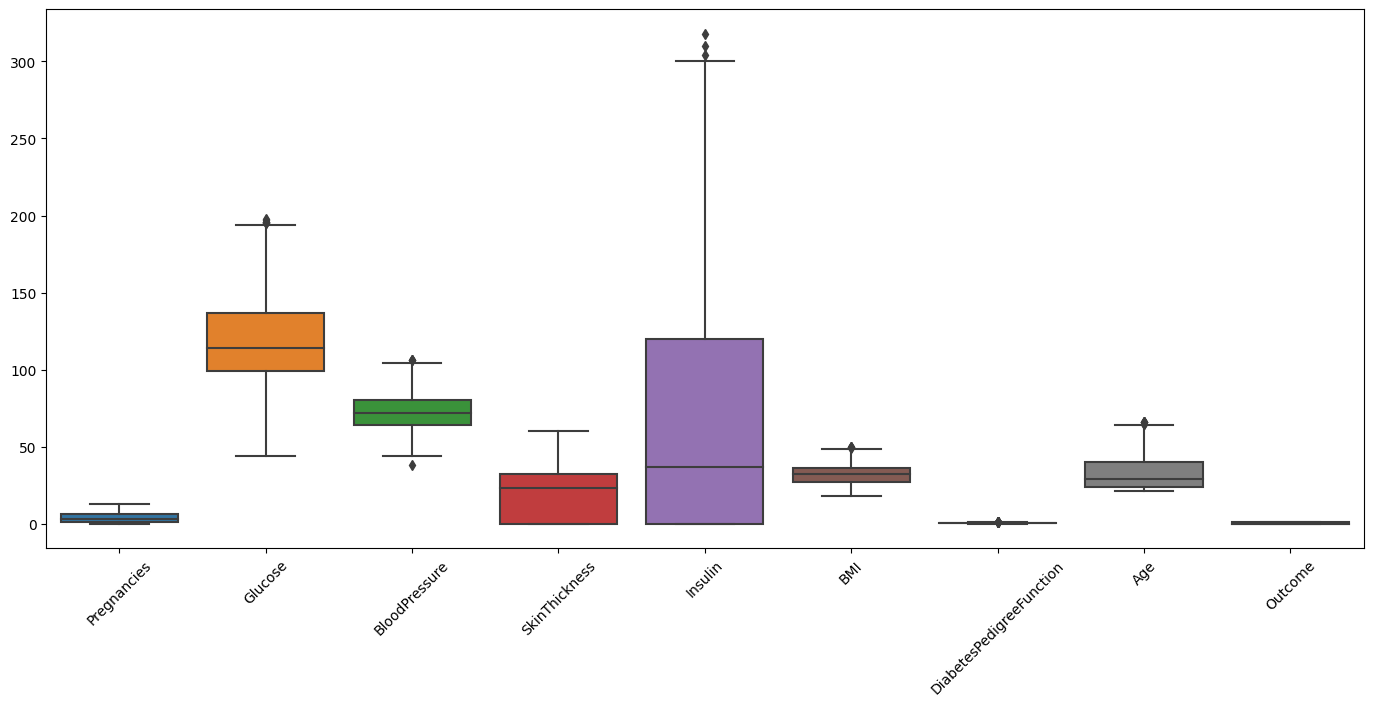

In [529]:
# now again check outliers
plt.figure(figsize=[17,7])
# df.plot.box()
sns.boxplot(df_clean)
plt.xticks(rotation=45)
plt.show()

In [530]:
## after this we can clearly see that we are Successfully remove the most of the outliers from our dataset


## make the dataset balance

In [531]:
df_clean["Outcome"].value_counts()

Outcome
0.0    439
1.0    200
Name: count, dtype: int64

In [532]:
# split x,y
x=df_clean.drop(columns="Outcome")
y=df_clean["Outcome"]
y.value_counts()

Outcome
0.0    439
1.0    200
Name: count, dtype: int64

In [533]:
## use SMOTE
from imblearn.over_sampling import SMOTE

# X and y are your feature matrix and target vector, respectively
smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(x, y)

In [534]:
y_balanced.value_counts() # now its balanced

Outcome
1.0    439
0.0    439
Name: count, dtype: int64

# sol 3

In [535]:
##split the dataset
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, Y_test = train_test_split(X_balanced, y_balanced, test_size=0.33, random_state=52)


# sol 4

In [587]:
## build decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV  ## this well help us to do the pre pruning of our tree and give the best hyper perimeters that improve the result of our model
perameter = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1, 2, 3,4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

gridcv=GridSearchCV(DecisionTreeClassifier(),param_grid=perameter,cv=5,scoring="accuracy")
gridcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [588]:
gridcv.best_params_ ## this are the best parameters which we can use to train our model

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [589]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [590]:
from sklearn.tree import DecisionTreeClassifier
treeclassifier=gridcv.best_estimator_
treeclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

# sol 5

In [591]:
# check performance
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
y_pred=treeclassifier.predict(X_test)

print(f"accuracy={accuracy_score(Y_test,y_pred)}")
print(f"precision={precision_score(Y_test,y_pred)}")
print(f"recall={recall_score(Y_test,y_pred)}")
print(f"f1score={f1_score(Y_test,y_pred)}")
print(f"classification_report=\n{classification_report(Y_test,y_pred)}")
print(f"confusion_matrix=\n{confusion_matrix(Y_test,y_pred)}")




accuracy=0.7586206896551724
precision=0.7207792207792207
recall=0.8043478260869565
f1score=0.7602739726027397
classification_report=
              precision    recall  f1-score   support

         0.0       0.80      0.72      0.76       152
         1.0       0.72      0.80      0.76       138

    accuracy                           0.76       290
   macro avg       0.76      0.76      0.76       290
weighted avg       0.76      0.76      0.76       290

confusion_matrix=
[[109  43]
 [ 27 111]]


# sol 6

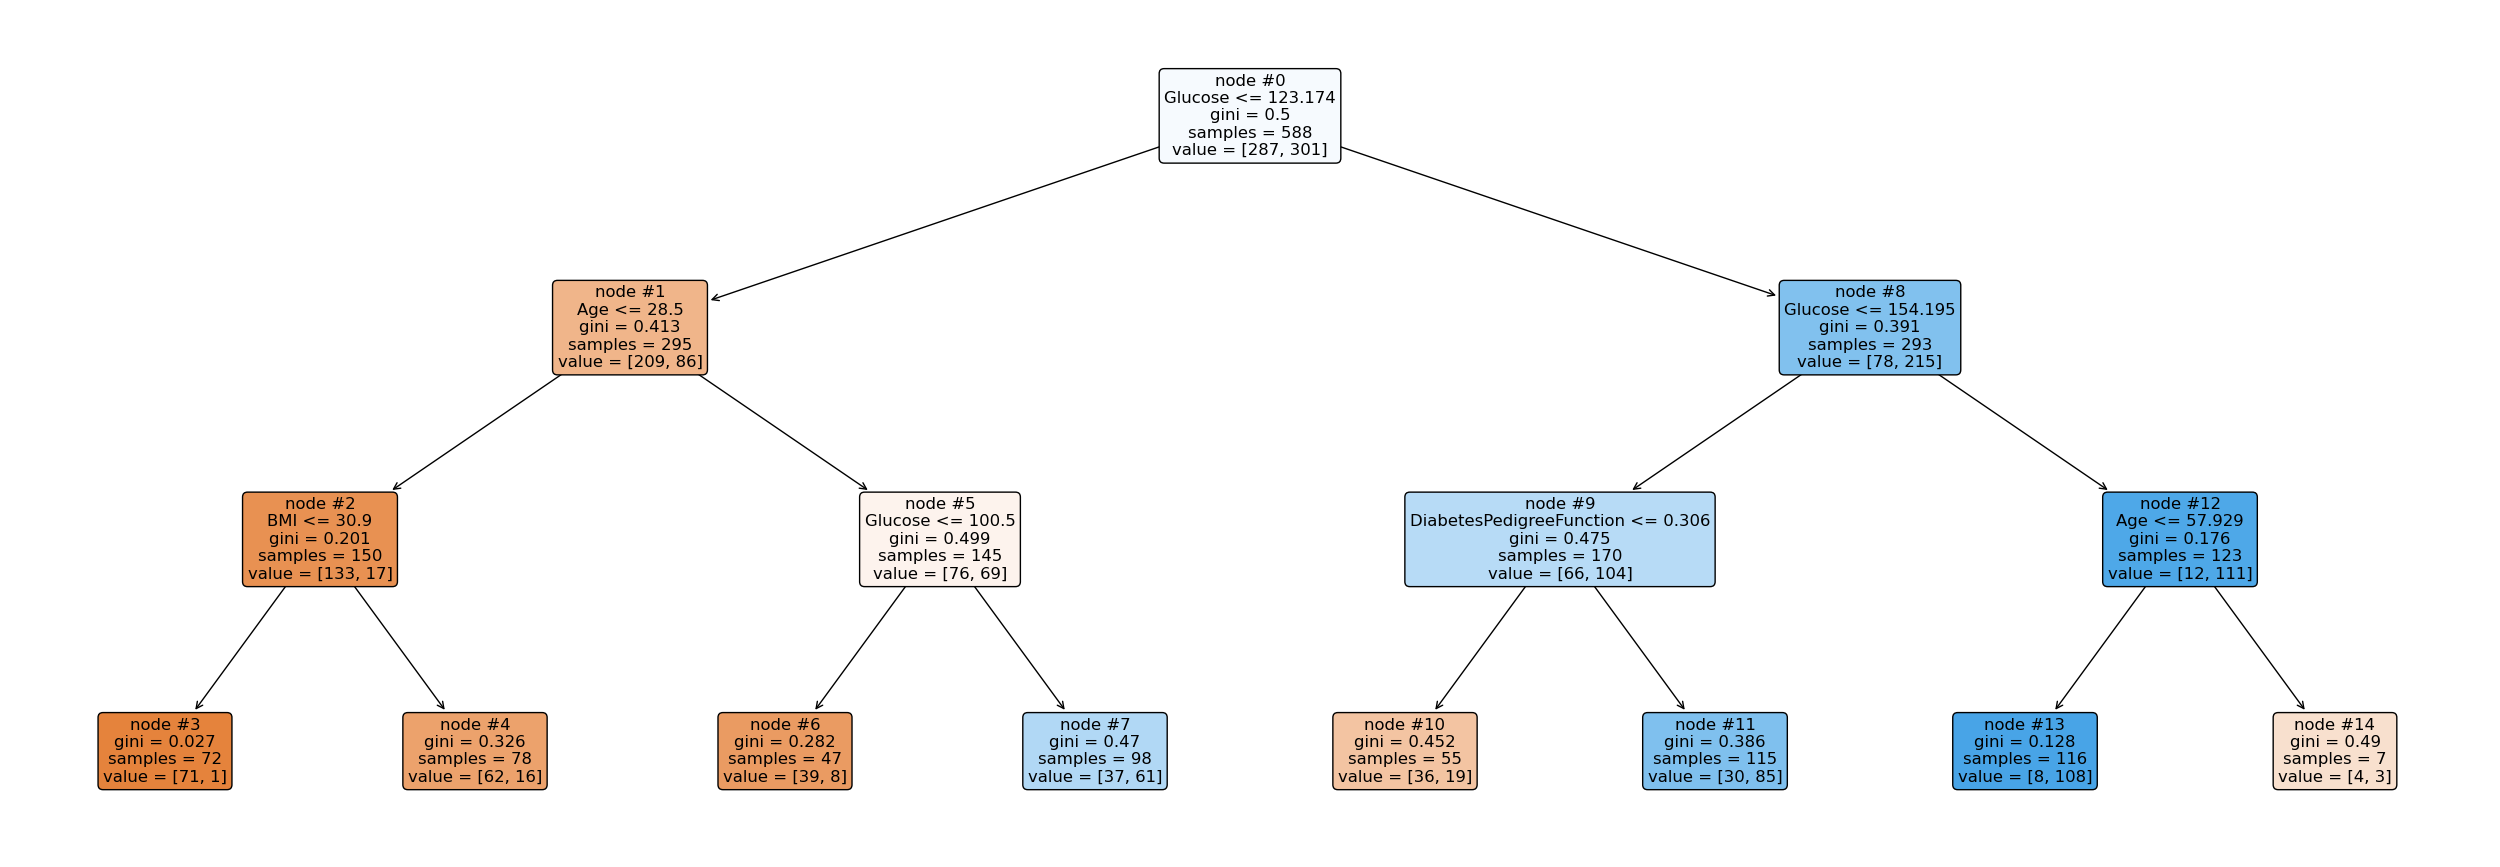

In [592]:
## lets watch the decision tree
from sklearn import tree
plt.figure(figsize=[32,11])
tree.plot_tree(treeclassifier,filled=True,feature_names=x_train.columns.to_list(),rounded=True,node_ids = True,proportion= False)
plt.show()

In [593]:
## Interpretations of tree
# In this tree, we can clearly see that on the route no. 0  we have glucose less than 123.174 then it splits into two subnodes  node #1 and node #8 this is the left most tree so basically tree start from the left side 
# We have eight leaf notes on depth of 3
# in our Dataset we have some main factors that are affecting to our diabetes. First is glucose second is age and after that diabetespedigrefunction, these are the most effective variables to detecting the diabetes.


In [595]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# sol 7

In [617]:
## test on the new data

# data=[1,56,46,63,94,32,0.167,40]              # non diabetic person data
data=[6,138,82,35,43,33.6,0.77,52]              # diabetic person data

print("The New Value we Enter")

for i,j in enumerate(X_test.columns):
    print(f"{j} = {data[i]}")

y_pred=treeclassifier.predict([data])
if y_pred==0:
    result="non diabetic"
elif y_pred==1:
    result="diabetic"
print(f"\n\nThe result is {y_pred}\nThe person is {result}\n\n")

The New Value we Enter
Pregnancies = 6
Glucose = 138
BloodPressure = 82
SkinThickness = 35
Insulin = 43
BMI = 33.6
DiabetesPedigreeFunction = 0.77
Age = 52


The result is [1.]
The person is diabetic




/Users/Designer/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
